In [2]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [3]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\4-gauss\4-gauss_NE_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.16134,0.067351,3.53370,0.46959,0.67908,3.43440,2.79240,2.77630,1.69910,3.815600,1.746400
1,-0.098505,-0.17857,2.062800,2.92160,0.42472,NaN,1.68020,1.38880,3.21670,2.92360,0.772910,NaN
2,-0.169460,0.50153,2.470900,3.06500,1.56760,1.48240,0.92160,2.64240,1.51870,2.53180,2.432800,1.876800
3,-0.136050,0.47279,0.588090,1.95630,2.78700,2.59570,2.89330,1.53750,0.99942,3.65930,0.618250,3.265800
4,0.098830,0.23418,0.429700,1.63120,3.55410,2.27110,0.37425,NaN,1.31400,1.06320,NaN,2.188400
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,-2.68670,1.576000,0.55612,NaN,2.07470,0.80304,NaN,3.49330,1.32550,3.231100,0.005387
796,NaN,-4.03460,3.100400,1.34610,1.37730,2.28870,0.39613,2.39610,2.46350,1.66750,2.461700,1.226700
797,3.344800,-2.38430,2.031000,2.26460,3.34120,1.53700,1.22560,0.74027,2.49540,1.34330,1.622500,1.585300
798,3.441400,-5.21630,1.577000,1.84400,NaN,3.42430,0.81081,3.72700,1.18790,0.95112,1.884500,1.143700


In [4]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	105
float64		column 2	27
float64		column 3	52
float64		column 4	105
float64		column 5	92
float64		column 6	104
float64		column 7	104
float64		column 8	79
float64		column 9	66
float64		column 10	52
float64		column 11	65
float64		column 12	91


In [5]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,695.000000,773.000000,748.000000,695.000000,708.000000,696.000000,696.000000,721.000000,734.000000,748.000000,735.000000,709.000000
mean,1.455129,1.269443,1.999034,1.919721,1.973718,2.019500,1.953880,1.993988,1.988980,1.976351,1.946344,1.975534
std,2.722050,3.644076,1.130919,1.134139,1.142535,1.133451,1.145745,1.129816,1.118738,1.148902,1.161880,1.102217
min,-4.692600,-6.952900,0.020547,0.002628,0.021103,0.001674,0.005922,0.004193,0.009369,0.002484,0.006944,0.002088
25%,-0.420905,-0.808680,1.044075,0.960250,0.994255,1.015450,1.005475,0.991210,1.075550,1.026400,0.903755,1.051400
50%,0.610890,0.564340,2.013550,1.877500,1.997900,2.045150,1.972050,2.001500,1.988450,1.992000,1.913900,1.956100
75%,3.902250,4.514300,2.920775,2.885500,2.905350,2.995925,2.906950,2.923100,2.963075,2.965500,2.957250,2.872000
max,6.982200,8.018800,3.992600,3.997300,3.998500,3.997500,3.999900,3.998200,3.996200,3.998800,3.990900,3.997000


<AxesSubplot:>

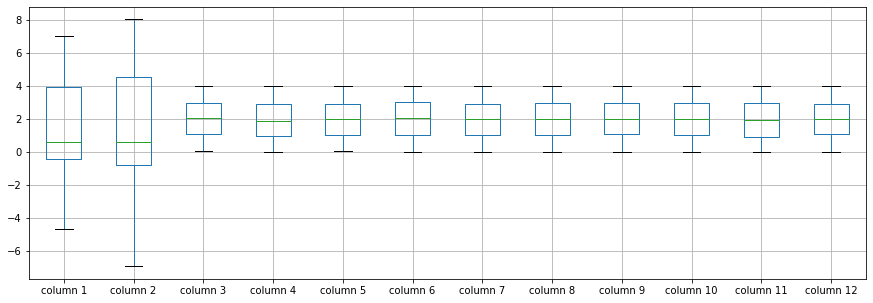

In [6]:
df.boxplot(return_type='axes', figsize=(15,5))

In [7]:
df.mean()

column 1     1.455129
column 2     1.269443
column 3     1.999034
column 4     1.919721
column 5     1.973718
column 6     2.019500
column 7     1.953880
column 8     1.993988
column 9     1.988980
column 10    1.976351
column 11    1.946344
column 12    1.975534
dtype: float64

In [8]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,-0.431562,0.019746,0.044500,0.095123,0.042210,-0.003119,0.022576,0.038742,0.003257,0.023500,0.029646
column 2,-0.431562,1.000000,-0.019837,-0.055182,-0.057340,-0.040762,0.026595,-0.024079,0.002775,-0.037019,-0.085376,0.001679
column 3,0.019746,-0.019837,1.000000,-0.030816,0.105540,-0.005519,0.025125,0.009110,-0.000150,-0.011961,-0.023464,0.064179
column 4,0.044500,-0.055182,-0.030816,1.000000,0.004227,-0.033162,0.003432,0.078381,0.020911,0.042415,0.062825,0.024624
column 5,0.095123,-0.057340,0.105540,0.004227,1.000000,0.067115,0.044091,0.016164,-0.009832,-0.015061,0.010040,-0.016610
column 6,0.042210,-0.040762,-0.005519,-0.033162,0.067115,1.000000,-0.097504,0.034739,0.042942,0.026289,-0.040782,-0.011856
column 7,-0.003119,0.026595,0.025125,0.003432,0.044091,-0.097504,1.000000,-0.034756,-0.023478,-0.027560,-0.034500,0.019360
column 8,0.022576,-0.024079,0.009110,0.078381,0.016164,0.034739,-0.034756,1.000000,-0.062807,-0.038156,0.014575,-0.020773
column 9,0.038742,0.002775,-0.000150,0.020911,-0.009832,0.042942,-0.023478,-0.062807,1.000000,0.047602,-0.002548,-0.021027
column 10,0.003257,-0.037019,-0.011961,0.042415,-0.015061,0.026289,-0.027560,-0.038156,0.047602,1.000000,-0.068276,0.019122


In [9]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [10]:
imputer = md.Midas(layer_structure = [12,12+5,12+57+57,12+57+57,12+57+57+57+57,12+57+57+57,12+57+57,12+57,12], vae_layer = False, seed = 100)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 26.621535339355468
Epoch: 1 , loss: 26.45011703491211
Epoch: 2 , loss: 26.13689323425293
Epoch: 3 , loss: 24.811403999328615
Epoch: 4 , loss: 22.60411853790283
Epoch: 5 , loss: 21.856463661193846
Epoch: 6 , loss: 21.320005340576174
Epoch: 7 , loss: 20.903563766479493
Epoch: 8 , loss: 20.548353958129884
Epoch: 9 , loss: 20.02798530578613
Epoch: 10 , loss: 19.798020553588866
Epoch: 11 , loss: 19.58031074523926
Epoch: 12 , loss: 19.48127113342285
Epoch: 13 , loss: 19.455634117126465
Epoch: 14 , loss: 19.219947738647463
Epoch: 15 , loss: 19.021746368408202
Epoch: 16 , loss: 18.889189186096193
Epoch: 17 , loss: 18.809154090881346
Epoch: 18 , loss: 18.74516906738281
Epoch: 19 , loss: 18.68573657989502
Epoch: 20 , loss: 18.649862155914306
Epoch: 21 , loss: 18.596728591918946
Epoch: 22 , loss: 18.647732944488524
Epoch: 23 , loss: 18.595644912719727
Epoch: 24 , loss: 18.480026664733888
Epoch: 25 , loss: 18.4837

In [11]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(800, 12)

In [12]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.463080
column 2     0.042845
column 3     3.034900
column 4     0.379700
column 5     2.475300
column 6     2.162000
column 7     1.670000
column 8     0.755510
column 9     2.032100
column 10    3.847400
column 11    0.230250
column 12    0.359250
Name: 21, dtype: float64

In [13]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\4-gauss.xlsx', header=None,names=column_names)

In [14]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
1,0.000000,0.0,0.0,0.0,0.000000,-0.308373,0.0,0.000000,0.0,0.0,0.000000,0.242178
2,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
3,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
4,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,-0.902067,0.0,0.0,0.196666,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.000000,0.0,0.0,0.0,0.815818,0.000000,0.0,-2.312523,0.0,0.0,0.000000,0.000000
796,-2.732626,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
797,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
798,0.000000,0.0,0.0,0.0,-0.595415,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000


Calculating NRMSE Value

In [15]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [16]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [17]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(57.21036667496465, 248.22200824735242)

In [18]:
NRMS=numerator/denominator
NRMS


0.2304806373895529

In [19]:
new_df.iloc[66,:]

column 1     0.20762
column 2    -0.55052
column 3     2.33990
column 4     1.79480
column 5     1.40130
column 6     2.76580
column 7     1.30410
column 8     1.24930
column 9     1.05940
column 10    1.28430
column 11    1.87940
column 12    0.57524
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.16134,0.067351,3.53370,0.469590,0.679080,3.43440,2.792400,2.77630,1.69910,3.815600,1.746400
1,-0.098505,-0.17857,2.062800,2.92160,0.424720,0.870127,1.68020,1.388800,3.21670,2.92360,0.772910,0.883628
2,-0.169460,0.50153,2.470900,3.06500,1.567600,1.482400,0.92160,2.642400,1.51870,2.53180,2.432800,1.876800
3,-0.136050,0.47279,0.588090,1.95630,2.787000,2.595700,2.89330,1.537500,0.99942,3.65930,0.618250,3.265800
4,0.098830,0.23418,0.429700,1.63120,3.554100,2.271100,0.37425,1.276533,1.31400,1.06320,1.223566,2.188400
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,-2.68670,1.576000,0.55612,0.886587,2.074700,0.80304,0.910377,3.49330,1.32550,3.231100,0.005387
796,0.733974,-4.03460,3.100400,1.34610,1.377300,2.288700,0.39613,2.396100,2.46350,1.66750,2.461700,1.226700
797,3.344800,-2.38430,2.031000,2.26460,3.341200,1.537000,1.22560,0.740270,2.49540,1.34330,1.622500,1.585300
798,3.441400,-5.21630,1.577000,1.84400,0.503285,3.424300,0.81081,3.727000,1.18790,0.95112,1.884500,1.143700


In [21]:
imputations[-1].to_excel("4-gauss_NE_10(imp).xlsx", index=False, header=False)